In [34]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split

In [35]:
def roc_curve(probs, y_test):
    sort_probs = sorted(probs)
    TPRs = []
    FPRs = []
    thresholds = []
    ct_pos = sum(y_test)
    ct_neg = len(y_test) - ct_pos
    for i, thresh in enumerate(sort_probs):
        predicted = probs >= thresh
        true_pos = sum(predicted * y_test)
        false_pos = sum(predicted) - true_pos
        
        TPR = float(true_pos)/ct_pos
        FPR = float(false_pos)/ct_neg
        TPRs.append(TPR)
        FPRs.append(FPR)
        thresholds.append(thresh)
    
    return TPRs, FPRs, thresholds

In [36]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=2, n_samples=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression()
model.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)[:, 1]

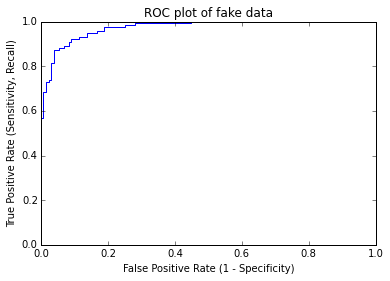

In [37]:
tpr, fpr, thresholds = roc_curve(probabilities, y_test)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of fake data")
plt.show()
pass

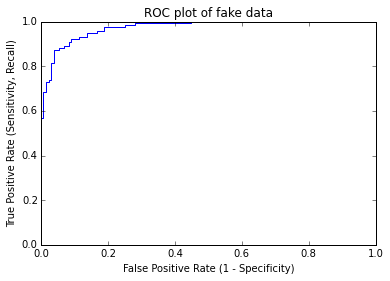

In [38]:
from sklearn.metrics import roc_curve as rcurve
fpr, tpr, thresholds = rcurve(y_test, probabilities)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of fake data")
plt.show()

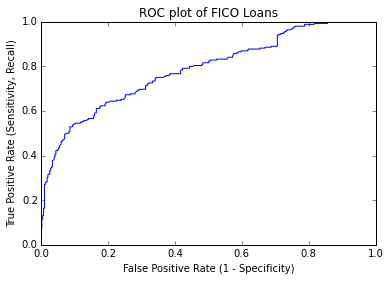

In [42]:
import pandas as pd
df = pd.read_csv('data/loanf.csv')
y = (df['Interest.Rate'] <= 12).values
X = df[['FICO.Score', 'Loan.Length', 'Loan.Amount']].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression()
model.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)[:, 1]

tpr, fpr, thresholds = roc_curve(probabilities, y_test)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of FICO Loans")
plt.show()

In [163]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('data/grad.csv')
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [164]:
rank_admit = pd.crosstab(df['admit'], df['rank'])
rank_admit

rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


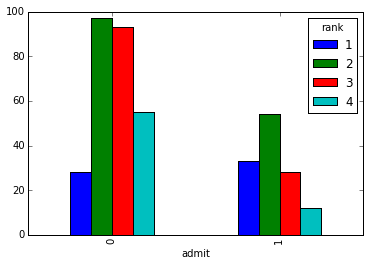

In [165]:
rank_admit.plot(kind='bar')
pass

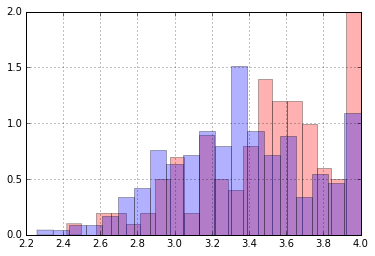

In [166]:
df[df.admit == 1]['gpa'].hist(bins=20, alpha=.3, color='red', normed=1)
df[df.admit == 0]['gpa'].hist(bins=20, alpha=.3, color='blue', normed=1)
pass

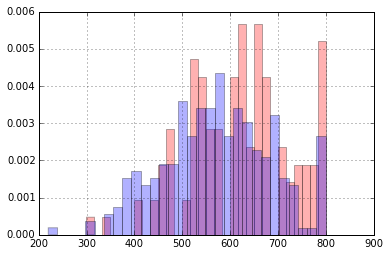

In [167]:
df[df.admit == 1]['gre'].hist(bins=30, alpha=.3, color='red', normed=1)
df[df.admit == 0]['gre'].hist(bins=30, alpha=.3, color='blue', normed=1)
pass

In [168]:
df[df.admit == 1].count()

admit    127
gre      127
gpa      127
rank     127
dtype: int64

In [169]:
df[df.admit == 0].count()

admit    273
gre      273
gpa      273
rank     273
dtype: int64

When dealing with an unbalanced data set, we end up biasing the model towards whichever class is overrepresented, potentially skewing our predictions. We can control for this bias by using propensity scores if we have knowledge of the probability of each class.

In [170]:
from statsmodels.discrete.discrete_model import Logit

logit_model = Logit(df['admit'], df[['gre', 'gpa', 'rank']])
logit_res = logit_model.fit()
# y_pred = logit_model.predict(df[['gre', 'gpa', 'rank']].T)
logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.586372
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Thu, 24 Sep 2015   Pseudo R-squ.:                 0.06176
Time:                        18:24:18   Log-Likelihood:                -234.55
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 1.971e-07
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0015      0.001      1.420      0.155        -0.001     0.004
gpa           -0.0042      0.201     -0.021      0.983        -0.398     0.390
rank          -0.6695      0.121     -5.527      0.000        -0.907    -0.432
==============================================================================
"""

In [171]:
logit_model = Logit(df['admit'], df[['gpa', 'rank']])
logit_res = logit_model.fit()
# y_pred = logit_model.predict(df[['gre', 'gpa', 'rank']].T)
logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.588917
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Thu, 24 Sep 2015   Pseudo R-squ.:                 0.05769
Time:                        18:24:19   Log-Likelihood:                -235.57
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.849e-08
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gpa            0.2551      0.086      2.950      0.003         0.086     0.425
rank          -0.6733      0.121     -5.562      0.000        -0.911    -0.436
==============================================================================
"""

Because GRE is likely collinear with both GPA and Rank, we removed it from our model. Before removing it, we were not seeing that anything besides Rank was significant, but after removing it, we see that both Rank and GPA are significant.

In [172]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cross_validation import cross_val_score

scores = []
for score in ['accuracy', 'precision', 'recall']:
    scores.append(cross_val_score(LogisticRegression(), df[['gpa', 'rank']], df['admit'], score, cv=10))

means = np.mean(scores, axis=1)
print "Accuracy: {}".format(means[0])
print "Precision: {}".format(means[1])
print "Recall: {}".format(means[2])

Accuracy: 0.71707942464
Precision: 0.623333333333
Recall: 0.219230769231


In [173]:
df_rank = pd.get_dummies(df, columns=['rank']).drop('rank_4', axis=1)
df_rank.head()

,admit,gre,gpa,rank_1,rank_2,rank_3
0,0,380,3.61,0,0,1
1,1,660,3.67,0,0,1
2,1,800,4.00,1,0,0
3,1,640,3.19,0,0,0
4,0,520,2.93,0,0,0


In [174]:
r_scores = []
for score in ['accuracy', 'precision', 'recall']:
    r_scores.append(cross_val_score(LogisticRegression(), df_rank.drop(['admit', 'gre', 'rank_2', 'rank_3'], axis=1), df_rank['admit'], score, cv=10))

means = np.mean(r_scores, axis=1)
print "Accuracy: {}".format(means[0])
print "Precision: {}".format(means[1])
print "Recall: {}".format(means[2])

logit_model = Logit(df_rank['admit'], df_rank.drop(['admit', 'gre', 'rank_2', 'rank_3'], axis=1))
logit_res = logit_model.fit()
logit_res.summary()

Accuracy: 0.714576297686
Precision: 0.638333333333
Recall: 0.219230769231
Optimization terminated successfully.
         Current function value: 0.614626
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Thu, 24 Sep 2015   Pseudo R-squ.:                 0.01655
Time:                        18:24:22   Log-Likelihood:                -245.85
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                  0.004017
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gpa           -0.2653      0.035     -7.505      0.000        -0.335    -0.196
rank_1         1.0808      0.285      3.795      0.000         0.523     1.639
==============================================================================
"""

In [175]:

Accuracy: 0.71226235147
Precision: 0.609047619048
Recall: 0.219230769231

SyntaxError: invalid syntax (<ipython-input-175-39050062116b>, line 2)

In [176]:
logit_model = Logit(df_rank['admit'], df_rank.drop(['admit', 'gre', 'rank_2', 'rank_3'], axis=1))
logit_res = logit_model.fit()
logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.614626
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Thu, 24 Sep 2015   Pseudo R-squ.:                 0.01655
Time:                        18:24:23   Log-Likelihood:                -245.85
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                  0.004017
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gpa           -0.2653      0.035     -7.505      0.000        -0.335    -0.196
rank_1         1.0808      0.285      3.795      0.000         0.523     1.639
==============================================================================
"""

The model does worse with the rank column binarized because ranks 2, 3, 4 do not offer any significant predictive power towards the admittance classification, whereas rank 1 alone appears to be a strong factor in admit rates.

In [177]:
df_rank = pd.get_dummies(df, columns=['rank']).drop('rank_4', axis=1)
df_rank['gpa_r1'] = df_rank['gpa'] * df_rank['rank_1']
df_rank.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,gpa_r1
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,4
3,1,640,3.19,0,0,0,0
4,0,520,2.93,0,0,0,0


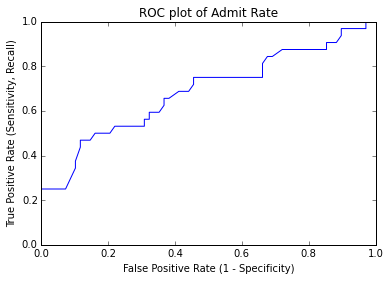

Optimization terminated successfully.
         Current function value: 0.614626
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Thu, 24 Sep 2015   Pseudo R-squ.:                 0.01655
Time:                        18:38:00   Log-Likelihood:                -245.85
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                  0.004017
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gpa           -0.2653      0.035     -7.505      0.000        -0.335    -0.196
rank_1         1.0808      0.285      3.795      0.000         0.523     1.639
==============================================================================
"""

In [215]:
X = df_rank.drop(['admit', 'gre', 'rank_2', 'rank_3', 'gpa_r1'], axis=1)
y = df_rank['admit']
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression()
model.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)[:, 1]

tpr, fpr, thresholds = roc_curve(probabilities, y_test)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of Admit Rate")
plt.show()
pass

logit_model = Logit(df_rank['admit'], df_rank.drop(['admit', 'gre', 'rank_2', 'rank_3', 'gpa_r1'], axis=1))
logit_res = logit_model.fit()
logit_res.summary()

In [216]:
the_thresh = [thresholds[i] for i, item in enumerate(zip(tpr, fpr)) if item[0] > .6 and item[1] < .4]
the_thresh

[0.29086310939060428,
 0.29160517969145938,
 0.29234836271549741,
 0.29234836271549741]

It depends on how selective we want to be in screening unqualified applicants at this stage. If we are an extremely selective school, we can tolerate a higher amount of false negatives (applicants that might have been admitted eventually but do not make the first round cut), whereas if we are a less selective school, we can tolerate a higher amount of false positives since we want to ensure that we evaluate a greater proportion of applicants more thoroughly.

tl;dr:
more selective school => lower threshold

less selective => higher threshold

In [217]:
coeffs = model.coef_

In [218]:
np.exp(coeffs)

array([[ 1.19691872,  2.47336469]])

Increasing the GPA by 1 point decreases the odds by a factor of 13.4%.
Being ranked 1 increases the odds by a factor of 44%

In [220]:
print np.log(2)/coeffs[0][0]
print np.log(2)/coeffs[0][1]

3.85616231506
0.765418410371


In [227]:
import statsmodels.api as sm

new_X = df.groupby('rank').mean().drop('admit', axis=1)
new_X['is_rank1'] = [1, 0, 0, 0]
new_X

,gre,gpa,is_rank1
rank,,,
1,611.803279,3.453115,1
2,596.026490,3.361656,0
3,574.876033,3.432893,0
4,570.149254,3.318358,0


In [234]:
probabilities = model.predict_proba(new_X.drop(['gre'], axis=1))[:, 1]
odds = [float(p)/(1-p) for p in probabilities]
for i in xrange(len(probabilities)):
    print "rank: {}, probability: {}, odds: {}".format(i+1, probabilities[i], odds[i])

rank: 1, probability: 0.502387723923, odds: 1.00959672435
rank: 2, probability: 0.286495011641, odds: 0.401531897204
rank: 3, probability: 0.289119667945, odds: 0.406706522755
rank: 4, probability: 0.284906746451, odds: 0.39841901044
